In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from iterative_heuristic.consolidated import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['epigenomics-chameleon-hep-1seq-50k-001.json',
'epigenomics-chameleon-hep-1seq-100k-001.json',
'epigenomics-chameleon-hep-2seq-50k-001.json',
'epigenomics-chameleon-hep-2seq-100k-001.json',
'epigenomics-chameleon-hep-3seq-50k-001.json',
'epigenomics-chameleon-hep-3seq-100k-001.json',
'epigenomics-chameleon-hep-4seq-50k-001.json',
'epigenomics-chameleon-hep-4seq-100k-001.json',
'epigenomics-chameleon-hep-5seq-50k-001.json',
'epigenomics-chameleon-hep-5seq-100k-001.json',
'epigenomics-chameleon-hep-6seq-50k-001.json',
'epigenomics-chameleon-hep-6seq-100k-001.json',
'epigenomics-chameleon-hep-7seq-50k-001.json',
'epigenomics-chameleon-hep-7seq-100k-001.json',
'epigenomics-chameleon-ilmn-1seq-50k-001.json',
'epigenomics-chameleon-ilmn-1seq-100k-001.json',
'epigenomics-chameleon-ilmn-2seq-50k-001.json',
'epigenomics-chameleon-ilmn-2seq-100k-001.json',
'epigenomics-chameleon-ilmn-3seq-50k-001.json',
'epigenomics-chameleon-ilmn-3seq-100k-001.json',
'epigenomics-chameleon-ilmn-4seq-50k-001.json',
'epigenomics-chameleon-ilmn-4seq-100k-001.json',
'epigenomics-chameleon-ilmn-5seq-50k-001.json',
'epigenomics-chameleon-ilmn-5seq-100k-001.json',
'epigenomics-chameleon-ilmn-6seq-50k-001.json',
'epigenomics-chameleon-ilmn-6seq-100k-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/epigenomics/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

109
61
334
178
667
349
1006
520
1225
631
1474
760
1681
865
361
187
772
394
1189
607
1642
838
2095
1069
2542
1294


In [3]:
mrt = True
tie_breaking_rule = 2
plot = False

x = []
y = []
lbs= []
ubs = []

y_optimal = []
y_lb = []
bad_one = 0
box_whiskers_data = []
num_machines = 3
naives1 = []
naives2 = []
heur = []
for G in G_list:
    
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive1,naive2, true, order =iterative_and_naive_heuristic_no_ratio_reversed(num_machines, w, G, naive_version=4, verbose=False)
    # _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    # d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives1.append(naive1)
    naives2.append(naive2)
    print(naive1, naive2)
    # y.append(obj_opt)
    # lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
    print("______________________________________________________")
 

892.9598739755859 1562.2012517336054
______________________________________________________
379.16101825843043 534.1954090117648
______________________________________________________
4729.379649589649 13495.425547858422
______________________________________________________
1850.0709968864394 3960.0573407704474
______________________________________________________
13304.236833937832 52741.85825998632
______________________________________________________
5050.153132062258 14667.956470655412
______________________________________________________
24616.362954569544 119153.61547011607
______________________________________________________
9166.451276093081 32141.894960538993
______________________________________________________
33064.59370476972 176182.63723071746
______________________________________________________
12244.05220941459 47077.1227989149
______________________________________________________
43628.934569734614 254558.50371232853
__________________________________________

In [4]:
print("x is \n", x)
print("ubs are \n", ubs)
print("naives1 are \n",naives1)
print("naives2 are \n", naives2)
print("heurs are \m",heur)

x is 
 [109, 61, 334, 178, 667, 349, 1006, 520, 1225, 631, 1474, 760, 1681, 865, 361, 187, 772, 394, 1189, 607, 1642, 838, 2095, 1069, 2542, 1294]
ubs are 
 [1068.4382324185588, 419.03273024570973, 5626.654594826957, 2052.8825787402698, 15982.524359073323, 5733.391808401277, 28085.48896049425, 10479.699005935394, 39732.51605764563, 14730.344437244068, 50354.58015940982, 19619.69960547354, 61447.21393439518, 23841.178574121528, 6336.710991354907, 2180.057010141759, 18333.857384960316, 6712.984001912688, 38073.43642433022, 13922.695137534422, 61909.86603299422, 22617.00893307134, 84314.09195383202, 30804.88510500508, 119523.22630844347, 41405.551534516424]
naives1 are 
 [892.9598739755859, 379.16101825843043, 4729.379649589649, 1850.0709968864394, 13304.236833937832, 5050.153132062258, 24616.362954569544, 9166.451276093081, 33064.59370476972, 12244.05220941459, 43628.934569734614, 16175.206481309086, 53125.201938176935, 19633.767388530305, 5311.775409903457, 1991.0349168219986, 16559.080

In [5]:
ratios1 = [n/h for n,h in zip(naives1, heur)]
print(ratios1)
ratios2 = [n/h for n,h in zip(naives2, heur)]
print(ratios2)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.7494641106083084, 1.408888000843128, 2.8535297539560758, 2.1404893906423, 3.9642903924745916, 2.904457763375914, 4.8404232457093155, 3.506470933235407, 5.328437990311742, 3.8448972606239593, 5.834625718522949, 4.2051165161369815, 6.223377382743574, 4.475944426619039, 2.9694580027979933, 2.198863550149994, 4.26397852713185, 3.0845368166093237, 5.261785243843258, 3.7864118213621794, 6.165897466250446, 4.424189238332227, 6.953463124097923, 4.981041076690485, 7.651501694695841, 5.469078230443153]


In [2]:
ratios1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
ratios2 = [1.7494641106083084, 1.408888000843128, 2.8535297539560758, 2.1404893906423, 3.9642903924745916, 2.904457763375914, 4.8404232457093155, 3.506470933235407, 5.328437990311742, 3.8448972606239593, 5.834625718522949, 4.2051165161369815, 6.223377382743574, 4.475944426619039, 2.9694580027979933, 2.198863550149994, 4.26397852713185, 3.0845368166093237, 5.261785243843258, 3.7864118213621794, 6.165897466250446, 4.424189238332227, 6.953463124097923, 4.981041076690485, 7.651501694695841, 5.469078230443153]
x = [109, 61, 334, 178, 667, 349, 1006, 520, 1225, 631, 1474, 760, 1681, 865, 361, 187, 772, 394, 1189, 607, 1642, 838, 2095, 1069, 2542, 1294]


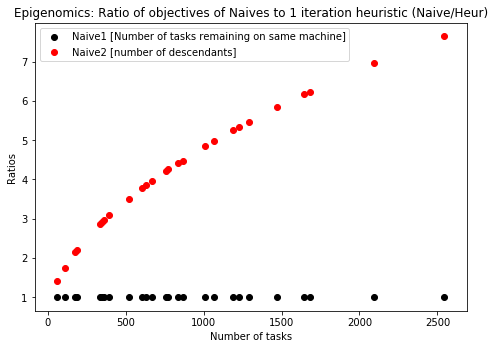

In [3]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios1, label='Naive1 [Number of tasks remaining on same machine]', color='k')
plt.scatter(x, ratios2, label='Naive2 [number of descendants]', color='r')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.title("Epigenomics: Ratio of objectives of Naives to 1 iteration heuristic (Naive/Heur)")
plt.legend()
plt.show()

In [7]:
import csv
with open("epigenomics_both_naives_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "naive1", "heuristic", "upperbound"])
    writer.writerows(zip(x,  naives1, naives2, heur,  ubs))